# Overview of character counts

Introduction: 3050 characters

Prediction:

Research question:

Conclusion:


-egne notat: fjerne flere outliers? price, minimum nights, availibility. kan fjerne outliers for minimum nights? Burde kanskje visualisere data først også gjøre data cleaningen etterpå etter å ha sett hva som må cleanes?

# Introduction

We have chosen the Airbnb challenge as our topic. -Explain structure and content of report.

# Data cleaning

Load dataset and necessary imports

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from re import sub
from decimal import Decimal
from sklearn.preprocessing import MultiLabelBinarizer
from scipy import stats

airbnb_uc=pd.read_csv("listings_CPH.csv")

airbnb_uc.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
13810,653494030951422457,Top-floor Villa Apartment in the Heart of Hell...,465189427,Martine,NaN,sterbro,55.732840,12.572370,Entire home/apt,1250,14,0,NaN,NaN,1,0,0,NaN
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,NaN,Valby,55.667782,12.463285,Entire home/apt,450,3,3,2022-07-21,1.01,1,0,3,NaN
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,NaN,Valby,55.659536,12.474726,Entire home/apt,400,1,3,2022-08-14,1.27,1,0,3,NaN
13813,658612163688161695,Cosy apartment with a great view in Copenhagen,256903668,Sam,NaN,Brnshj-Husum,55.730971,12.487993,Entire home/apt,850,1,0,NaN,NaN,1,0,0,NaN
13814,648436253362373119,Big Bedroom connected with a large living room,141288846,Tanja,NaN,Bispebjerg,55.731420,12.521770,Private room,420,2,1,2022-07-07,0.37,2,0,1,NaN


Dropping columns not relevant and columns mainly contaiting non values

In [59]:
airbnb_uc.drop(columns=["name","host_id", "neighbourhood_group","license","host_name","last_review"], inplace=True, axis=1)

Checking for null values in each column and replacing with value zero

In [60]:
airbnb_uc.isnull().sum()
airbnb_uc.fillna({'reviews_per_month':0}, inplace=True)

Creating dummy variables for neighbourhood and room type

In [61]:
neighbourhood = pd.get_dummies(airbnb_uc['neighbourhood'].str.lower().str.replace(' ', '_'))
airbnb_uc1 = pd.merge(airbnb_uc, neighbourhood, left_index=True, right_index=True)
airbnb_uc1 = airbnb_uc1.drop('neighbourhood', 1)

room_type = pd.get_dummies(airbnb_uc['room_type'])
airbnb = pd.merge(airbnb_uc1, room_type, left_index=True, right_index=True)
airbnb = airbnb.drop('room_type', 1)

Normalizing the features of the dataset with values from 0 to 1

In [62]:
def normalizing(column):
    new_column = (column - column.min()) / (column.max() - column.min())
    return new_column

airbnb['minimum_nights'] = normalizing(airbnb['minimum_nights'])
airbnb['number_of_reviews'] = normalizing(airbnb['number_of_reviews'])
airbnb['reviews_per_month'] = normalizing(airbnb['reviews_per_month'])
airbnb['calculated_host_listings_count'] = normalizing(airbnb['calculated_host_listings_count'])
airbnb['availability_365'] = normalizing(airbnb['availability_365'])
airbnb['number_of_reviews_ltm'] = normalizing(airbnb['number_of_reviews_ltm'])

Checking if target variable price is evenly distributed over interval

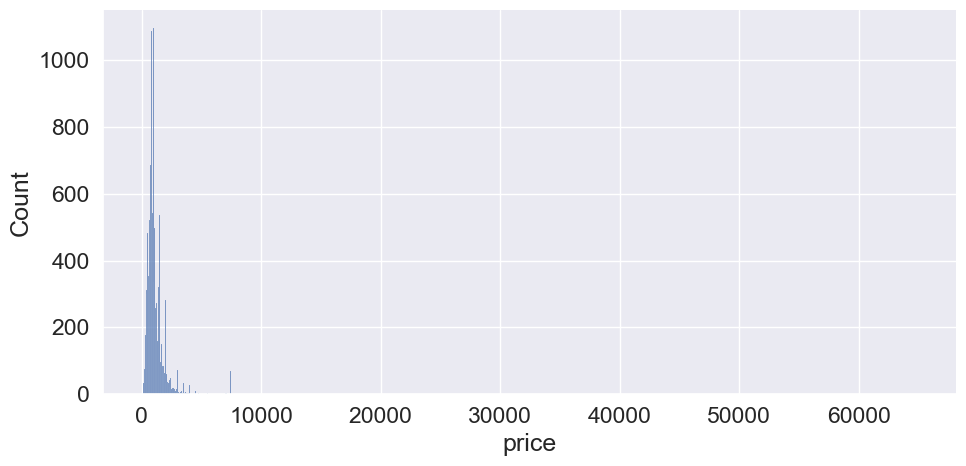

In [6]:
sns.set_theme(font_scale=1.5, style="darkgrid")
sns.displot(data=airbnb, x="price", kind="hist", aspect=2)

As seen from the histogram the price data is heavily skewed because of a few high outliers, we need to remove these to get a more precise distribution

In [63]:
airbnb.loc[airbnb['price']>4000]
airbnb = airbnb[airbnb['price'] < 4000]

# Data analysis and visualization

Making a plot of the Airbnb locations colour coded by price, to see if location is a plays a role in price differences

Populating the interactive namespace from numpy and matplotlib


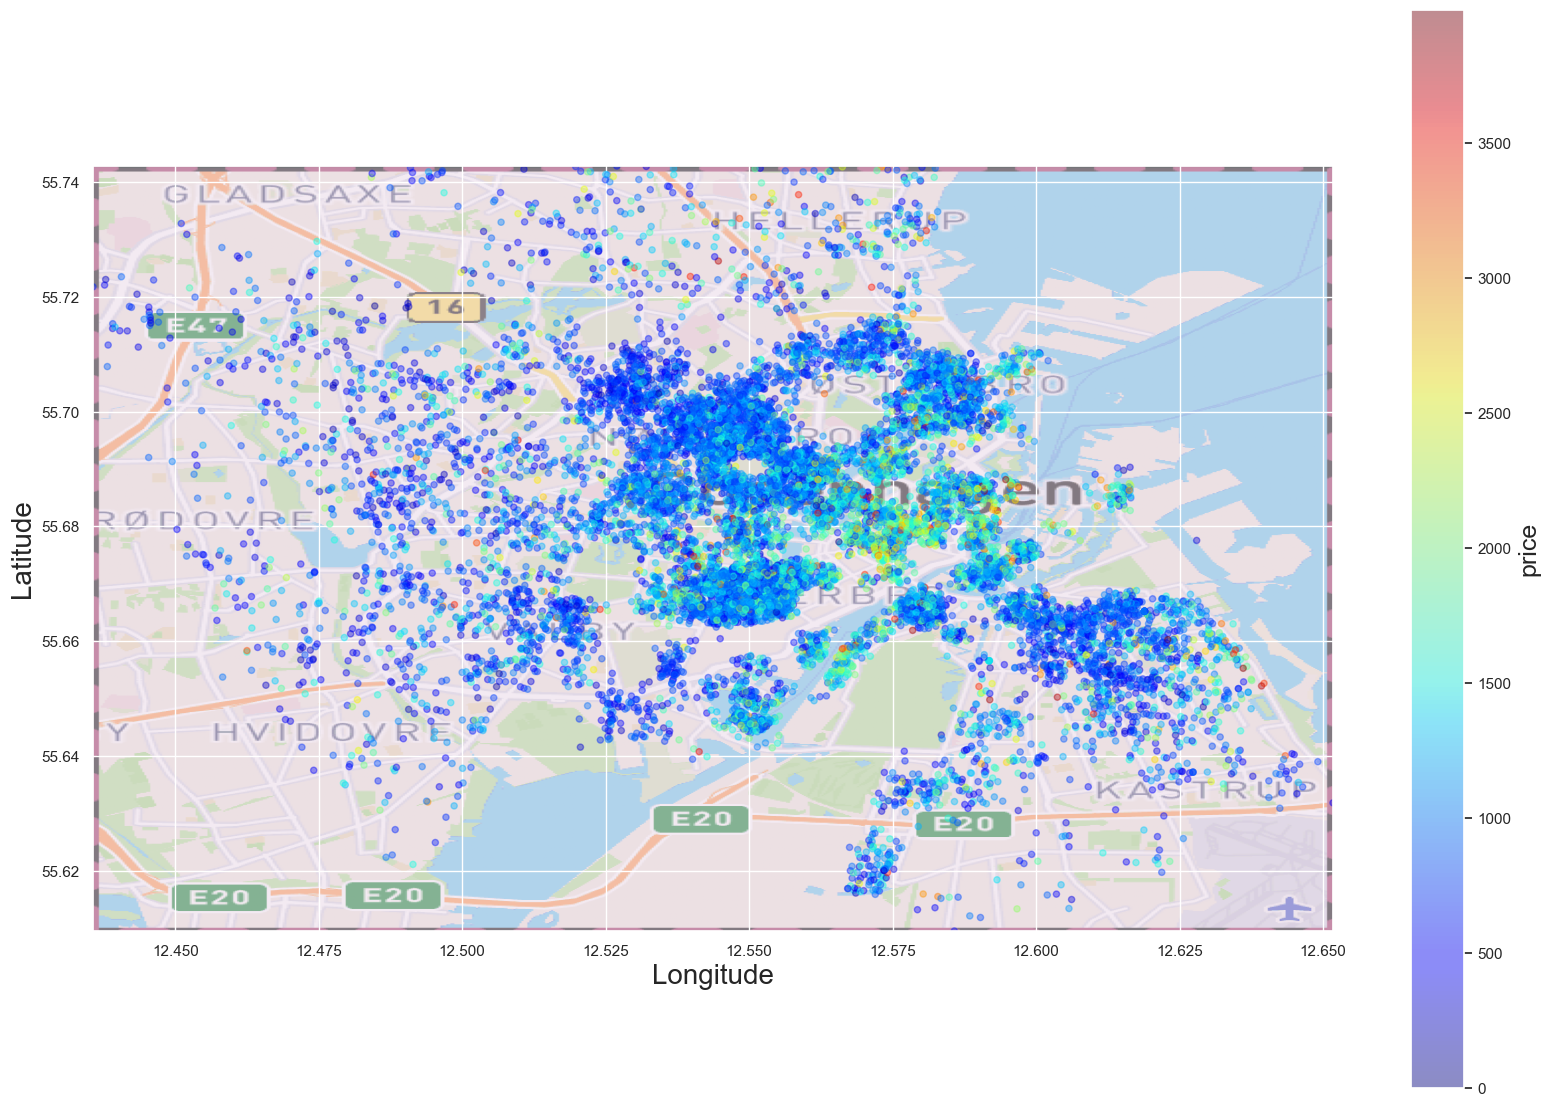

In [56]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
copenhagen_img = mpimg.imread('København2.png')
airbnb.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,14),c="price", cmap=plt.get_cmap("jet"),
                 colorbar=True, alpha=0.4)
plt.imshow(copenhagen_img, extent=[12.435670, 12.651740,55.609510,55.742800], alpha=0.5)
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
plt.ylim(55.609510, 55.742800)
plt.xlim(12.435670, 12.651740)
plt.show()

#Cred thegeekguy

Seems like the Airbnb rentals near the city center is valued higher.

Text(0, 0.5, 'Neighbourhood')

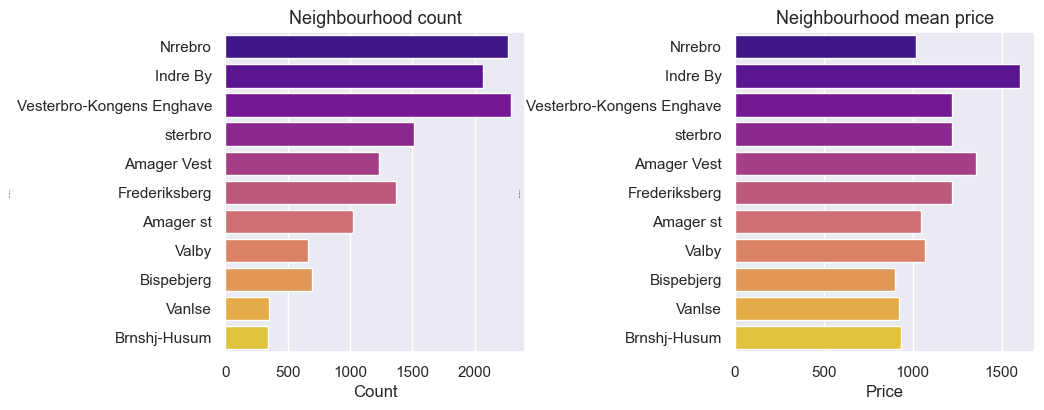

In [28]:
airbnb_uc.groupby("neighbourhood", as_index=False)['price'].mean()

plt.rc('xtick', labelsize=11)       
plt.rc('ytick', labelsize=11)       

fig, axes = plt.subplots(1,2, figsize=(9,4))
plt.subplots_adjust(left=0.0005 , bottom=0.1, right=0.9 , top=0.9, wspace=0.7, hspace=0.2)

ax1 = sns.countplot(y=airbnb_uc["neighbourhood"], palette="plasma", ax=axes[0])
axes[0].set_title("Neighbourhood count", fontsize=13)
ax1.set_xlabel("Count", fontsize = 12)
ax1.set_ylabel("Neighbourhood", fontsize = 0)


ax2=sns.barplot(data=airbnb_uc, x="price", y="neighbourhood", ci=False, palette="plasma", ax=axes[1])
axes[1].set_title("Neighbourhood mean price", fontsize=13)
ax2.set_xlabel("Price", fontsize = 12)
ax2.set_ylabel("Neighbourhood", fontsize = 0)


As seen from plot above, most of the airbnb rentals are located near the city and Indre By is where the prices are averagely the highest

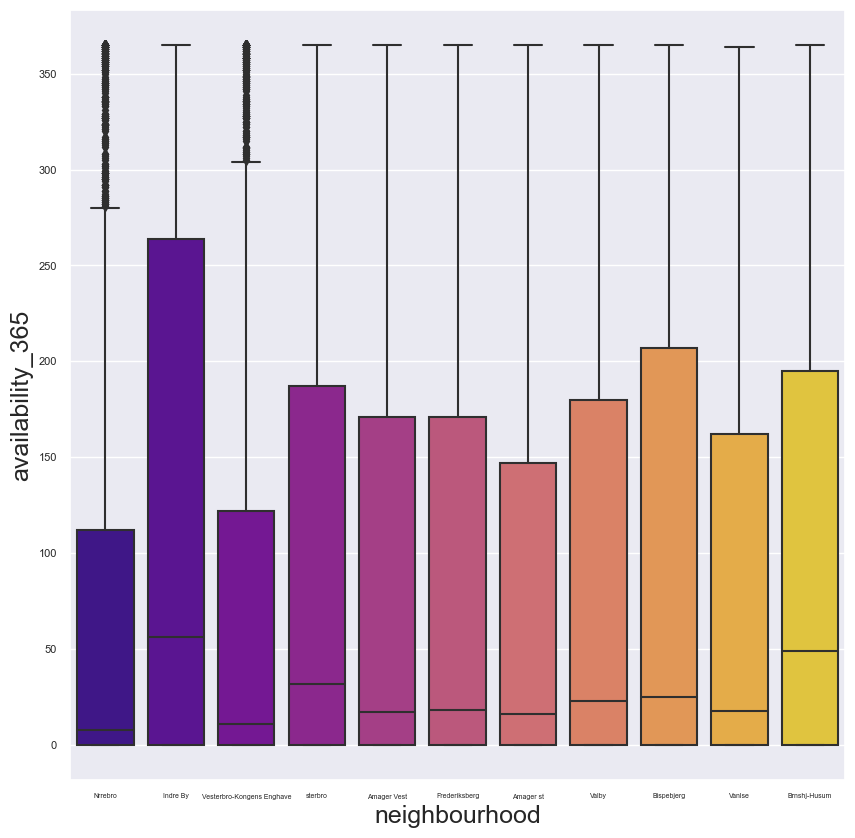

In [79]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb_uc, x='neighbourhood',y='availability_365',palette='plasma')
plt.rc('xtick', labelsize=5)       
plt.rc('ytick', labelsize=8)


Comparing neighbourhood with availibility, it seems Indre By also has the highest amount of availibility in a year

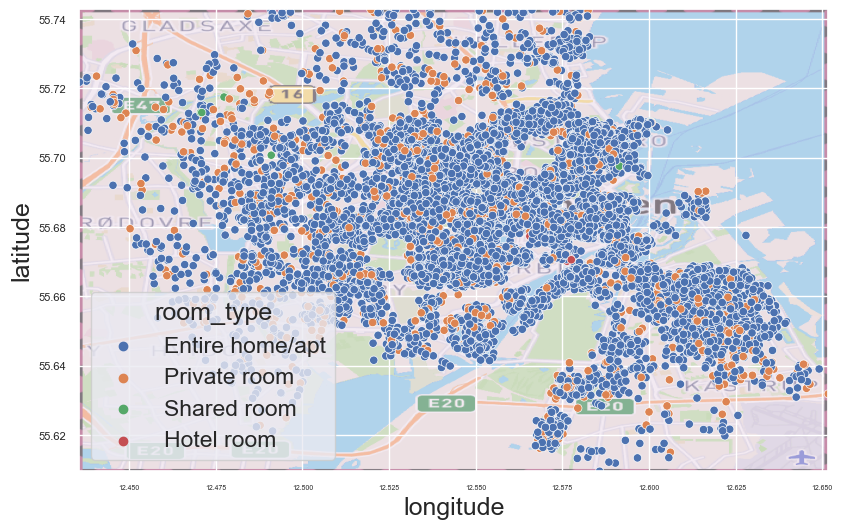

In [92]:
copenhagen_img = mpimg.imread('København2.png')
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_uc.longitude,airbnb_uc.latitude,hue=airbnb_uc.room_type)
plt.imshow(copenhagen_img, extent=[12.435670, 12.651740,55.609510,55.742800], alpha=0.5)
plt.ioff()
plt.show()

-

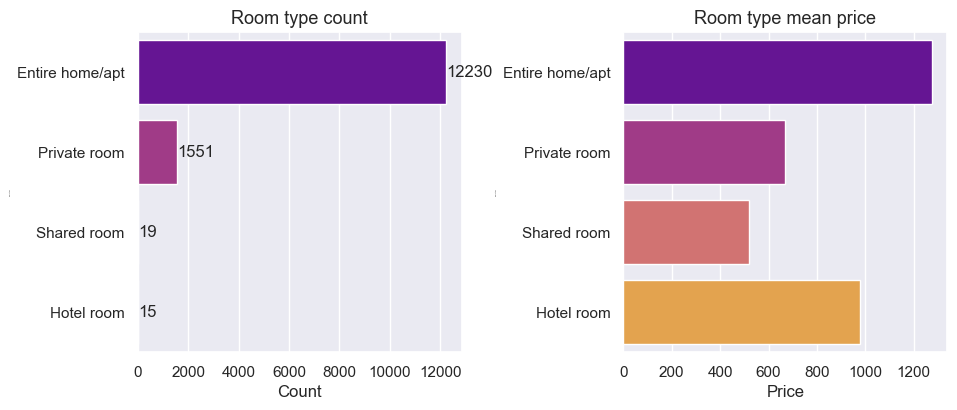

In [31]:
airbnb_uc.groupby("room_type", as_index=False)['price'].mean()

plt.rc('xtick', labelsize=11)       
plt.rc('ytick', labelsize=11)

fig, axes = plt.subplots(1,2, figsize=(9,4))
plt.subplots_adjust(left=0.0005 , bottom=0.1, right=0.9 , top=0.9, wspace=0.5, hspace=0.2)

ax1 = sns.countplot(y=airbnb_uc["room_type"],palette="plasma", ax=axes[0])
axes[0].set_title("Room type count", fontsize=13)
ax1.bar_label(ax1.containers[0], fontsize=12)
ax1.set_xlabel("Count", fontsize = 12)
ax1.set_ylabel("Room type", fontsize = 0)



ax2=sns.barplot(data=airbnb_uc, x="price", y="room_type", ci=False, palette="plasma", ax=axes[1])
axes[1].set_title("Room type mean price", fontsize=13)
ax2.set_xlabel("Price", fontsize = 12)
ax2.set_ylabel("Room type", fontsize = 0)

plt.show()

Room type is also an important indicator of price. To rent a entire home/apartement is more expensive than other categories, altough must be noted that data base for shared room and hotel room is low. 

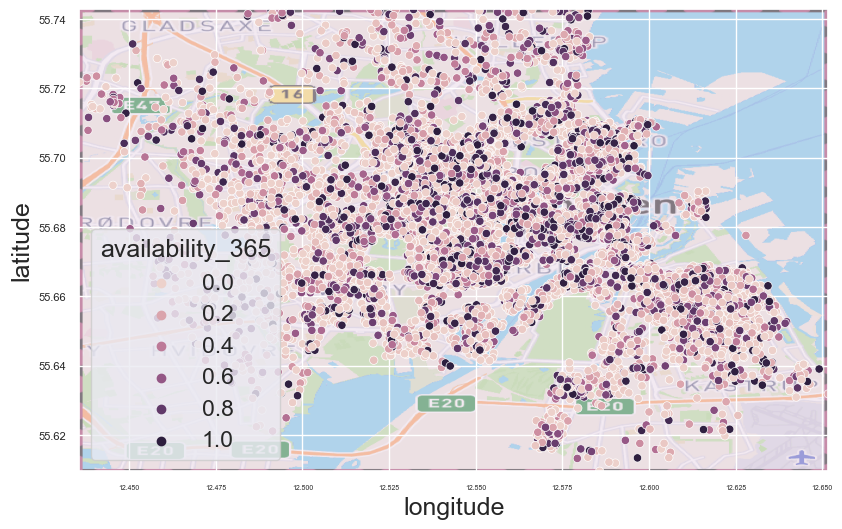

In [93]:
copenhagen_img = mpimg.imread('København2.png')
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.imshow(copenhagen_img, extent=[12.435670, 12.651740,55.609510,55.742800], alpha=0.5)
plt.ioff()
plt.show()

Availibility of the rooms

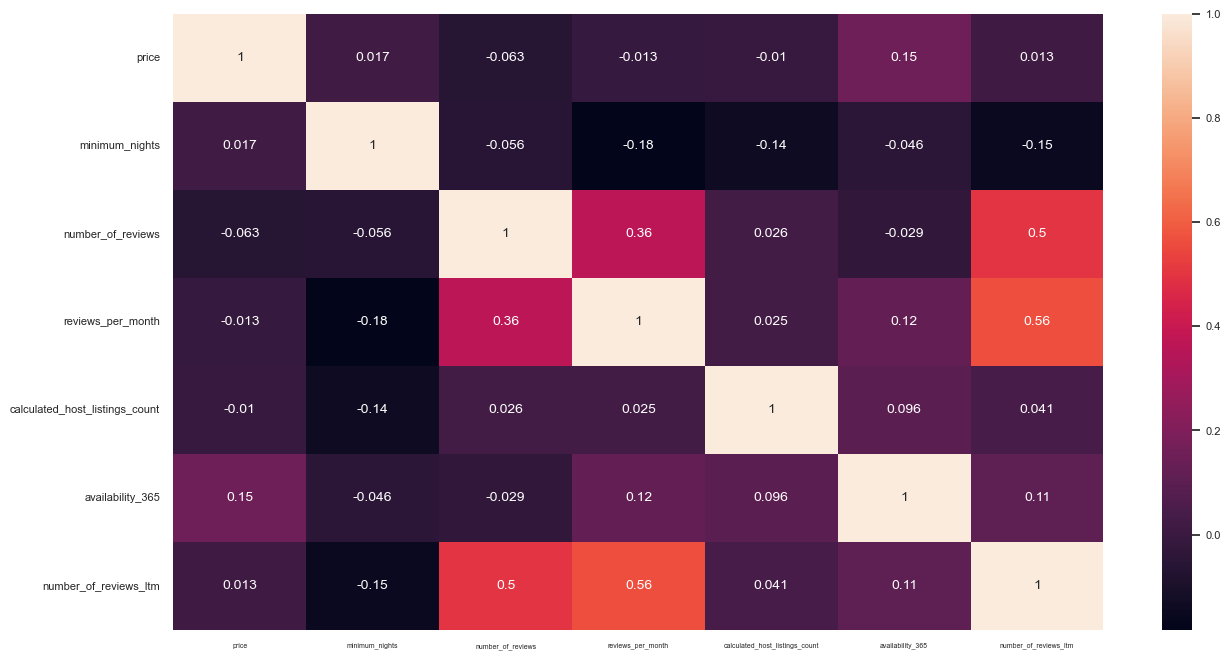

In [88]:
data=airbnb[['price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']]
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(method="kendall"), annot=True, annot_kws={"size":10})
plt.show()

Number of reviews and reviews have the highest correlation, since they display similar information

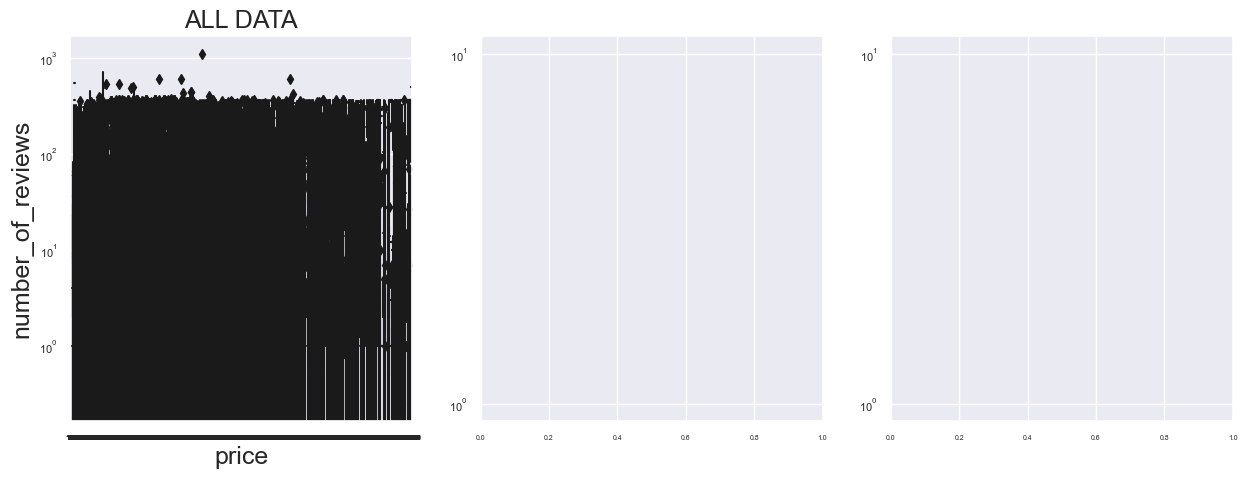

In [101]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(15,5))
ax1.set_yscale("log")
ax2.set_yscale("log")
ax3.set_yscale("log")

sns.boxplot(data=airbnb_uc, x='price', y='minimum_nights',
            palette='viridis', ax=ax1).set_title('ALL DATA')
sns.boxplot(data=airbnb_uc, x='price', y='availability_365',
            palette='viridis', ax=ax1).set_title('ALL DATA')
sns.boxplot(data=airbnb_uc, x='price', y='number_of_reviews',
            palette='viridis', ax=ax1).set_title('ALL DATA')

plt.show()